In [3]:
from skyfield.api import Star, load, wgs84, Time, Angle, Timescale, N, W
from skyfield.data import hipparcos
import numpy as np
import matplotlib.pyplot as plt

In [5]:
earth = load('de421.bsp')['earth']
boston = earth + wgs84.latlon(42.3583 * N, 71.0603 * W, elevation_m=43)
type(boston)

skyfield.vectorlib.VectorSum

In [18]:
with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
df_null = df[df['ra_degrees'].isnull()]
df = df[df['ra_degrees'].notnull()]

In [19]:
df

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25
...,...,...,...,...,...,...,...,...
118318,6.99,359.963744,11.673709,1.92,-2.16,2.09,23.997583,1991.25
118319,8.23,359.973913,-22.428180,10.63,148.74,27.53,23.998261,1991.25
118320,7.59,359.976057,5.956638,5.00,20.92,-35.26,23.998404,1991.25


In [20]:
df_null

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
421,8.83,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
1338,9.20,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
1902,8.88,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
2189,7.82,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
3158,9.59,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
...,...,...,...,...,...,...,...,...
112856,8.86,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
114349,12.41,NaN,NaN,NaN,NaN,NaN,NaN,1991.25
115125,5.19,NaN,NaN,NaN,NaN,NaN,NaN,1991.25


In [23]:
np.all(np.invert(np.isin(df.index.to_numpy(), df_null.index.to_numpy())))

True

In [6]:
stars = Star.from_dataframe(df)

In [7]:
ts = load.timescale()
t = ts.J(1991.25)
earth = load('de421.bsp')['earth']
metric = earth.at(t).observe(stars)
ra, dec, dist = metric.radec()

In [8]:
R = 1.0
z = R * np.sin(dec.degrees / 180.0 * np.pi)
r = np.sqrt(R**2 - z**2) 
x = r * np.cos(ra.hours / 12.0 * np.pi)
y = r * np.sin(ra.hours / 12.0 * np.pi)
m = df['magnitude']

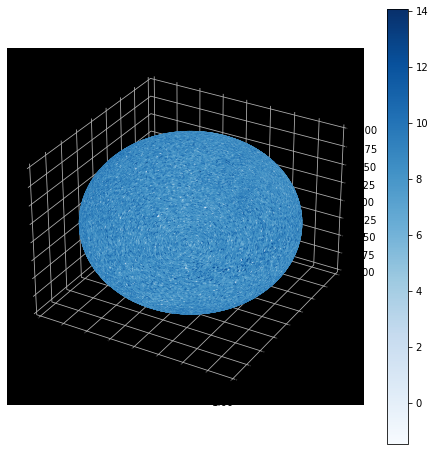

In [9]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
sc = ax.scatter(x, y, z, c=m, cmap='Blues', marker='.', s=10)
ax.set_xlim([-R, R])
ax.set_ylim([-R, R])
ax.set_zlim([-R, R])
ax.set_facecolor("#000")
ax.w_xaxis.set_pane_color((0, 0, 0, 0))
ax.w_yaxis.set_pane_color((0, 0, 0, 0))
ax.w_zaxis.set_pane_color((0, 0, 0, 0))
plt.colorbar(sc)
plt.show()